## 1. Import Libraries
___________

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## 2. Data Exploration
____

### Overview of the dataset

In [23]:
# import data

filename = "AdSmartABdata - AdSmartABdata.csv"

data = pd.read_csv(filename)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [24]:
# display data

data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


**Description about the variables/columns:**
   * **auction_id :** The unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.
   * **experiment :** which group the user belongs to - control or exposed.
   * **date       :** the date in YYYY-MM-DD format
   * **hour       :** the hour of the day in HH format.
   * **device_make:** the name of the type of device the user has e.g. Samsung
   * **platform_os:** the id of the OS the user has.
   * **browser    :** the name of the browser the user uses to see the BIO questionnaire.
   * **yes        :** 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
   * **no         :** 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [25]:
# data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


**Findings:**
   * The dataset contains 8077 rows and 9 columns
   * 5 out of 9 variables are in object type and the other 4 are numerical

In [26]:
# Understanding the data distribution for the the continuous data values
# which is the campaign duration from "hour" variable

data.hour.describe()

count    8077.000000
mean       11.615080
std         5.734879
min         0.000000
25%         7.000000
50%        13.000000
75%        15.000000
max        23.000000
Name: hour, dtype: float64

**Findings:**
   * The average hour is 11.61 hours, i.e 11h37mn
   * Standard deviation is 5.73 hours, i.e 5h44mn
   * the longest duration is 23 hours

In [27]:
data.describe(include = [object])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,269,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


**Findings:**
   * experiment variables:
           - There are 8077 values
           - There exist 2 unique values
           - "Control" is the most frequent value, it is repeated 4071 times
   * device_make variables:
           - There are 8077 values
           - There exist 269 unique values
           - "Generic Smartphone" is the most frequent value, it is repeated 4743 times
   * browser variables:
           - There are 8077 values
           - There exist 15 unique values
           - "Chrome Mobile" is the most frequent value, it is repeated 4554 times

### Sanity check

In [28]:
# checking missing values
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

**Findings:**
There are no missing values on the dataset

In [29]:
# checking duplicate data

data.duplicated().sum()

0

**Findings:**
There are no duplicate values on the dataset

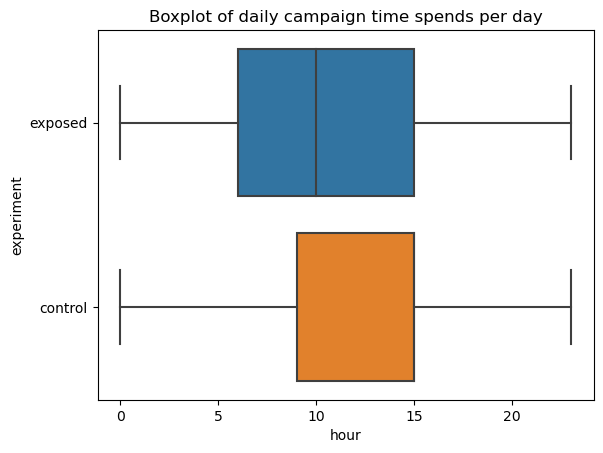

In [30]:
# Distribution Diagram
sns.boxplot(data = data, x = 'hour',  y = 'experiment')
plt.title("Boxplot of daily campaign time spends per day")
plt.show()

**Findings:**
   * There are no outliers on both variants
   * The duration of the campaign is at maximum 15 hours per day

In [31]:
# Counting the number of sample per experiment group
num_of_samples = data.groupby(['experiment'])['auction_id'].count().to_frame().reset_index()
num_of_samples.rename(columns = {'auction_id':'num_samples'}, inplace = True)
num_of_samples

,experiment,num_samples
0,control,4071
1,exposed,4006


**Findings:**
There are 4071 for the "control" and 4006 for the "exposed" which equal to the number total of samples (8077 rows).

## 3. Sample Ratio Mismatch (SRM)
___

In [32]:
# Make control data
data_control = data[data["experiment"] == "control"]

data_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [33]:
# Make treatment data
data_treatment = data[data["experiment"] == "exposed"]

data_treatment.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


In [34]:
# Number of users in the control group
n_control = data_control.shape[0]

n_control

4071

In [35]:
# Number of users in the treatment
n_treatment = data_treatment.shape[0]

n_treatment

4006

In [36]:
# Percentage in each group
n_total = data.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.40%
% treatment : 49.60%


**Finding:** Based on the above result, the sample size in two groups are different, thus it can be a sign of SRM. Besides, we need inferential statistics to prove that --with chi-square test.

### Chi-square test for detecting SRM

Consider the null and alternative hypothesis ($H_0$ and $H_1$)** :

$H_0$  : No SRM detected

$H_1$  : SRM detected

In [37]:
observed = [ n_control, n_treatment ]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

In [38]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.5230902562832735, pvalue=0.4695264353014863)


### Define decision rules

In making statistical test decisions, we can use:
- Comparison of chi-square statistics with critical value
     -  $\chi^2 > \chi^2_{\alpha,df}$ → reject $H_0$

- Comparison of p-value with alpha
   - pvalue < $\alpha$ → reject $H_0$

In [39]:
# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.01
df=(2-1)*(2-1)  

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 6.635


In [40]:
#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [41]:
# Comparison of P-Value with alpha.
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


**Findings:** 
* Based on the identification of SRM, even though the sample sizes of the data in the control and treatment groups are different, there exist not SRM.
* Thus, we can pass to the Statistical Analysis of our experiment.


## 4. Statisics Analysis
___

During this experiment, we are going to set:
  * Confidence level ($\alpha$) = 5%, 
  * Power ($1-\beta$) = 80%
  * MDE ($\delta$) = 1%

### Sample Size needed

In [42]:
# Determining the standard deviation of the population
# from the conversion

std_converted = data['yes'].std(ddof=0)
print(f'Standar Deviation of the converted Rate: {std_converted}')

Standar Deviation of the converted Rate: 0.25652121000331496


In [43]:
# Counting the number of samples

delta = 0.01 #MDE
n = (16*std_converted**2)/(delta)**2
print(f'The required number of samples per group: {round(n)}')
print(f'The number of samples needed for the entire group: {round(2*n)}')
print("--------------------")
print(f'Number of the existing data: {data.shape[0]}')

The required number of samples per group: 10529
The number of samples needed for the entire group: 21057
--------------------
Number of the existing data: 8077


**Findings:** 
* Based on the calculation of the number of samples, the data is not sufficient to support this A/B test. Thus, on a real case, we need to collect more samples (21.057 > 8.077). 
* Besides, for this experiment, we are gonna just use the existing dataset.

### Looking for conversion rate

In [44]:
# GroupBy experiment column and the users who click "YES" for BIO surveys
radio_yes = data[data['yes'] == 1]
convert_data = radio_yes.groupby('experiment')[['auction_id']].count()
convert_data.reset_index(inplace = True)
convert_data.rename(columns = {'auction_id':'num_of_converted'}, inplace = True)
convert_data['conversion_rate'] = convert_data['num_of_converted']/num_of_samples['num_samples']
convert_data

,experiment,num_of_converted,conversion_rate
0,control,264,0.064849
1,exposed,308,0.076885


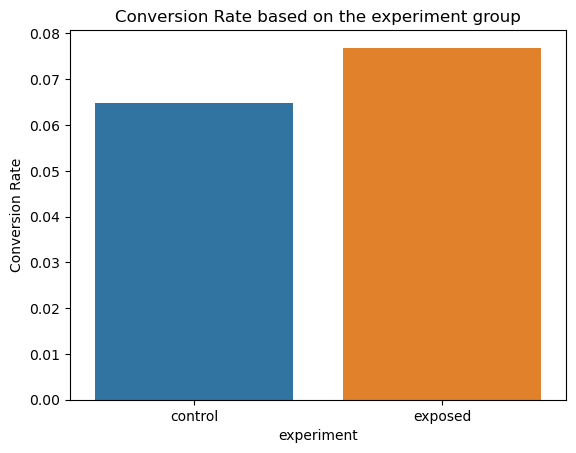

In [45]:
#Visualization of the conversion rate
sns.barplot(data = convert_data, x = 'experiment', y = 'conversion_rate')
plt.title("Conversion Rate based on the experiment group")
plt.ylabel('Conversion Rate')
plt.show()

**Findings:** 
Visually and computationally, the Conversion Rate "exposed" is higher than the "control". However, to ensure that the decisions taken are not wrong, it is necessary to carry out statistical tests.

In [46]:
# Calculating the Relative Effect
cr_treatment = convert_data['conversion_rate'][1]
cr_control = convert_data['conversion_rate'][0]
relative_effect = (cr_treatment - cr_control)/cr_control * 100

print(f"relative effect = {relative_effect:.3} %")

relative effect = 18.6 %


**Findings:** So far, we may expect that our hypothesis testing later will states that the interactive ads will be better. But to make everything sure, we have to conduct statistical testing.

### Hypothesis Testing

Consider $\mu_c$ is the conversion rate of "control"/"exposed" group (Static Ads) and $\mu_t$ is the conversion rate of "treatment" group (Interactive Ads), So
  * $H_0$ : $\mu_t \leq \mu_c$
  * $H_1$ : $\mu_t > \mu_c$

In [47]:
# count convert & total observation

n_treatment_convert = convert_data['num_of_converted'][1]
n_control_convert = convert_data['num_of_converted'][0]
n_treatment = num_of_samples['num_samples'][1]
n_control = num_of_samples['num_samples'][0]

count_convert = [n_treatment_convert,n_control_convert]
count_observation = [n_treatment,n_control]

**Calculating $z_{\text{statistics}}$ dan p-value**

In this case, we use 'larger', because we want to prove that $CR_{\text{interactive Ads}}$ is higher than the $CR_{\text{static Ads}}$

In [48]:
# Function to calculate z-stat and p-value

z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = "larger")

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 2.1083
P-value : 0.0175


In [49]:
convert_data['conversion_rate'][0] - convert_data['conversion_rate'][1]

-0.012035741524044075

**Findings:** 
* From the result above, the result of the difference is negative; i.e. the conversion rate of static Ads is lower than the conversion rate of interactive one.
* Bellow we are going to see the result related with alpha and z critical.

In [50]:
# From p-value

alpha = 0.05        # confidence level that we have set

# Making decision p_value and alpha
if p_value < alpha:
    print("Reject H_0")
else:
    print("Failed to reject H_0")

Reject H_0


In [51]:
# Z critical is the z-value at alpha
import scipy.stats as stats
z_critical = stats.norm.ppf(1 - alpha)

z_critical

1.6448536269514722

In [52]:
# From z-statistics

if z_stat > z_critical:
    print("Reject H_0")
else:
    print("Failed to reject H_0")

Reject H_0


### Visualization of the Result

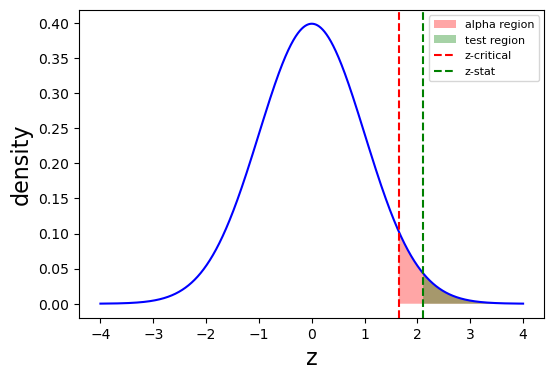

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Sample distribution plots
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot region of alpha (region where H-0 rejects)
# This region is red
x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


# Plot the region of the sample we got
# This region is green
x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "test region")


# Plot vertical line alpha
ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")


# Plot styling
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=8)
plt.show()

## 5. Conclusion

- p-value (0.0175) > 𝛼 (0.05) → Tolak $H_{\text{0}}$
- z statistics (2.1083) < z-table (1.644) → Tolak $H_{\text{0}}$


The conversion rate of the Interactive Ads is higher than the static's conversion rate.

in other words,

The Interactive Ads **increases** the interaction of the consumers to fill the BIO questionnaires.
